In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv("bitcoin.csv")

df = df.drop(['Adj Close'], axis=1) #Removing it because "Adj Close" and "close have the same value"

In [13]:
print(df.head(2))
print(df.describe())

         Date        Open        High         Low       Close    Volume
0  2014-09-17  465.864014  468.174011  452.421997  457.334015  21056800
1  2014-09-18  456.859985  456.859985  413.104004  424.440002  34483200
               Open          High           Low         Close        Volume
count   2713.000000   2713.000000   2713.000000   2713.000000  2.713000e+03
mean   11311.041069  11614.292482  10975.555057  11323.914637  1.470462e+10
std    16106.428891  16537.390649  15608.572560  16110.365010  2.001627e+10
min      176.897003    211.731003    171.509995    178.102997  5.914570e+06
25%      606.396973    609.260986    604.109985    606.718994  7.991080e+07
50%     6301.569824   6434.617676   6214.220215   6317.609863  5.098183e+09
75%    10452.399414  10762.644531  10202.387695  10462.259766  2.456992e+10
max    67549.734375  68789.625000  66382.062500  67566.828125  3.509679e+11


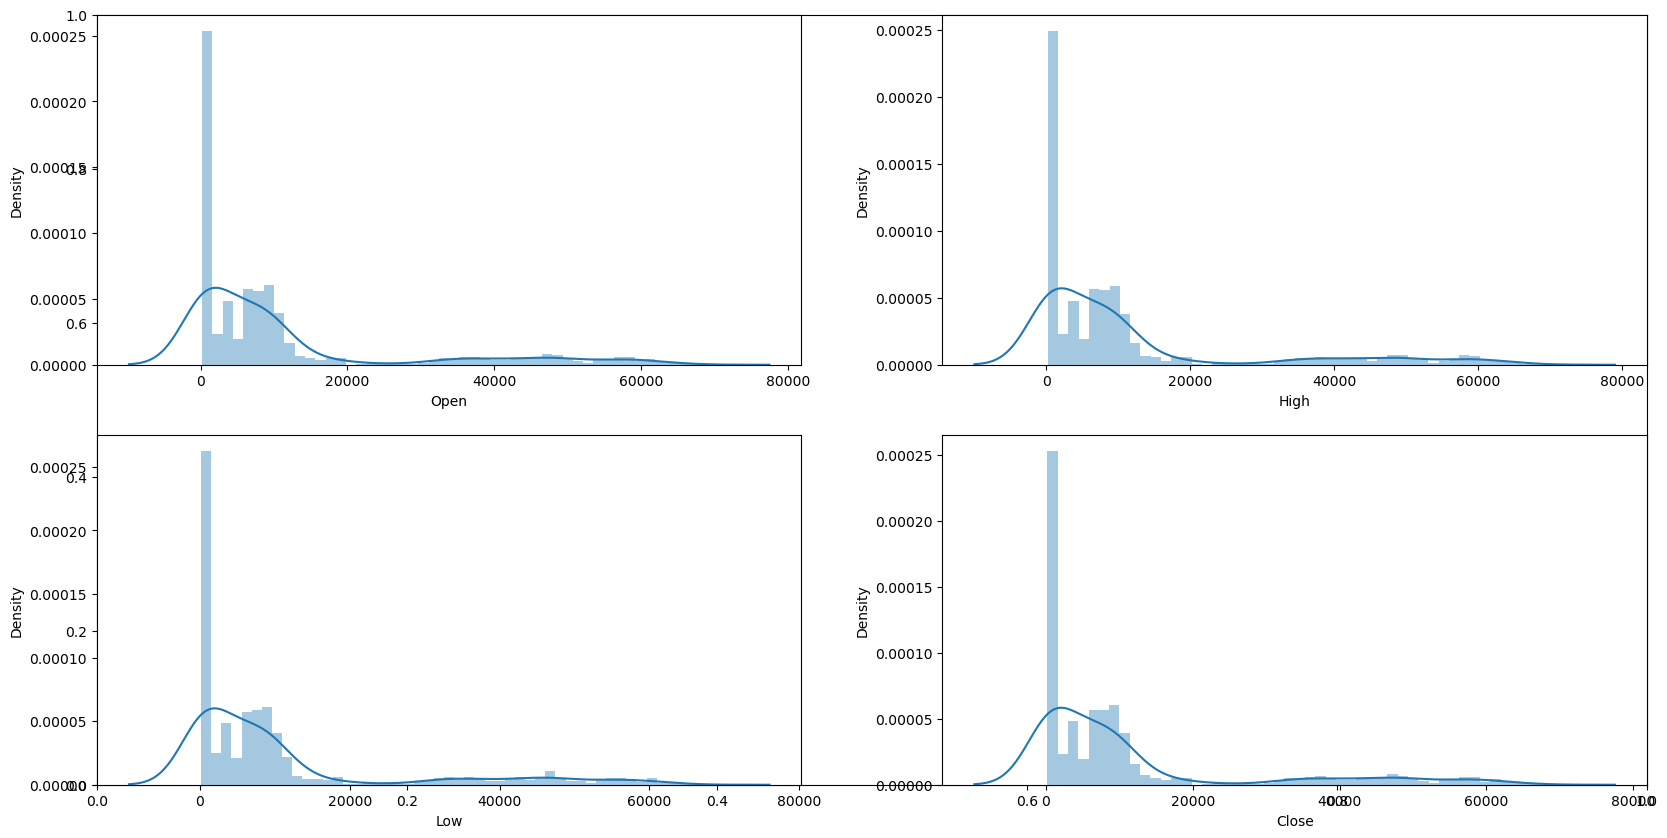

In [14]:
features = ['Open', 'High', 'Low', 'Close']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  seaborn.distplot(df[col])
plt.show()


## Removing the date column and making a new column with day, month and year

In [ ]:
splitted = df['Date'].str.split('-', expand=True)

df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')

#df = df.drop(['Date'], axis=1)

# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date']) 


df.head()

,Date,Open,High,Low,Close,Volume,year,month,day
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21


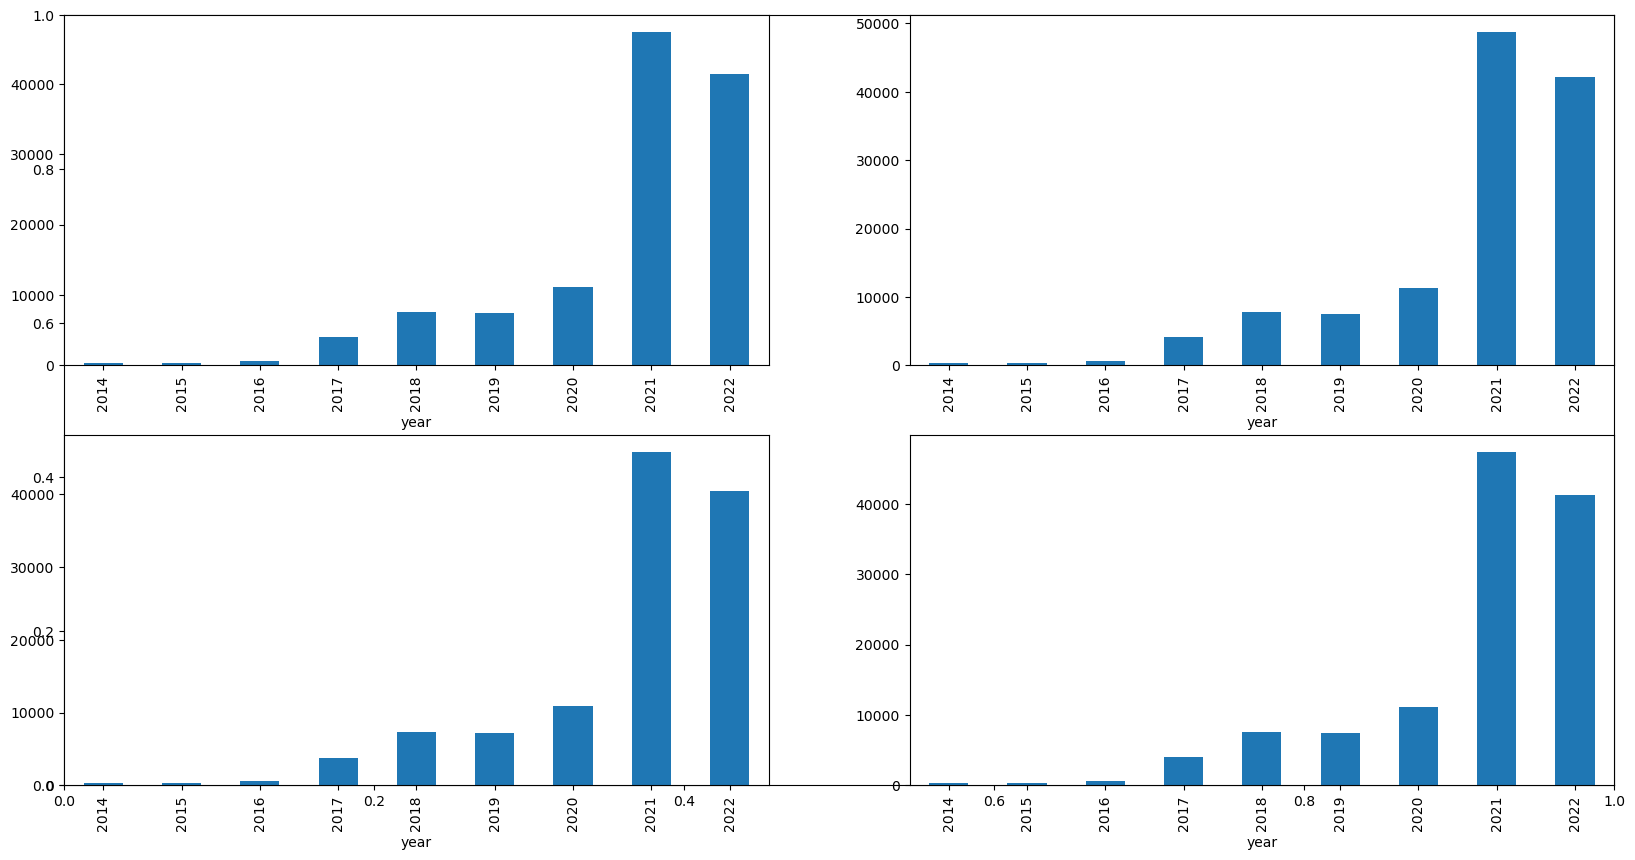

In [18]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

# Bitcoin orice over time

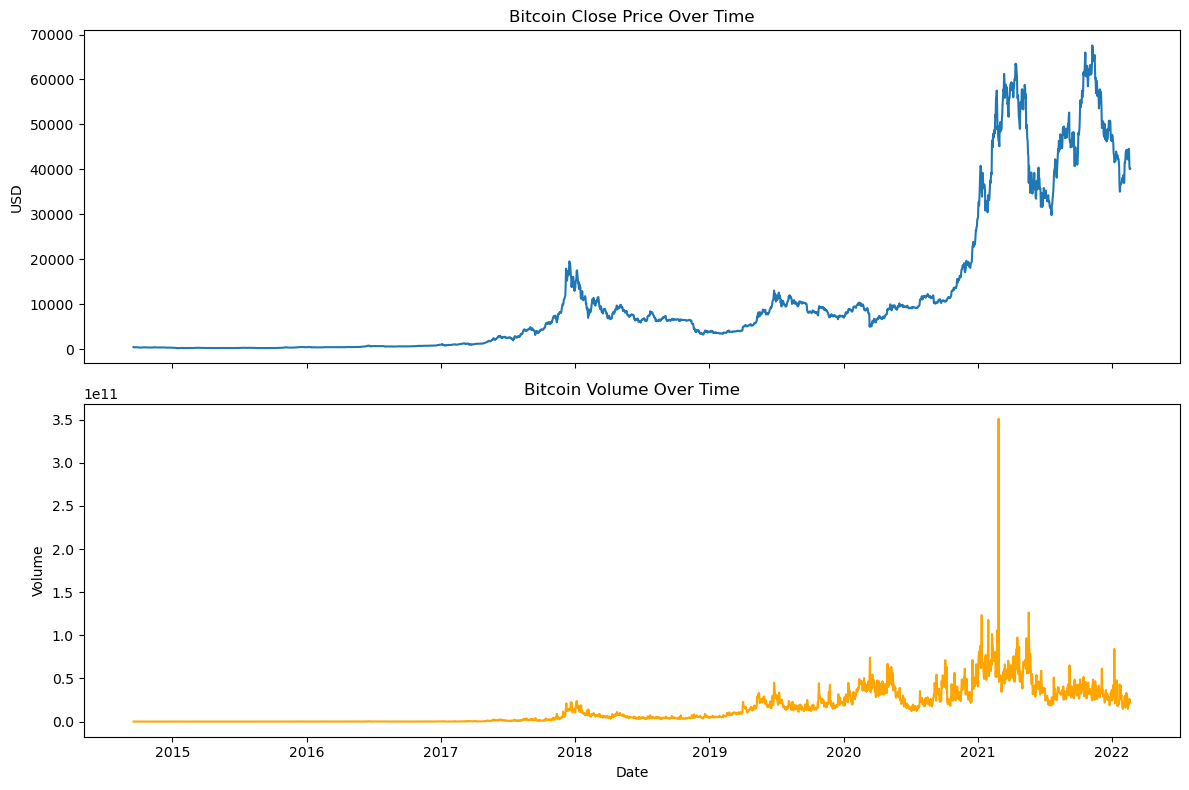

In [19]:
# Plotting Close Price and Volume over time
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

axs[0].plot(df['Date'], df['Close'], label='Close Price')
axs[0].set_title('Bitcoin Close Price Over Time')
axs[0].set_ylabel('USD')

axs[1].plot(df['Date'], df['Volume'], label='Volume', color='orange')
axs[1].set_title('Bitcoin Volume Over Time')
axs[1].set_ylabel('Volume')
axs[1].set_xlabel('Date')

plt.tight_layout()
plt.show()


# Roling windows

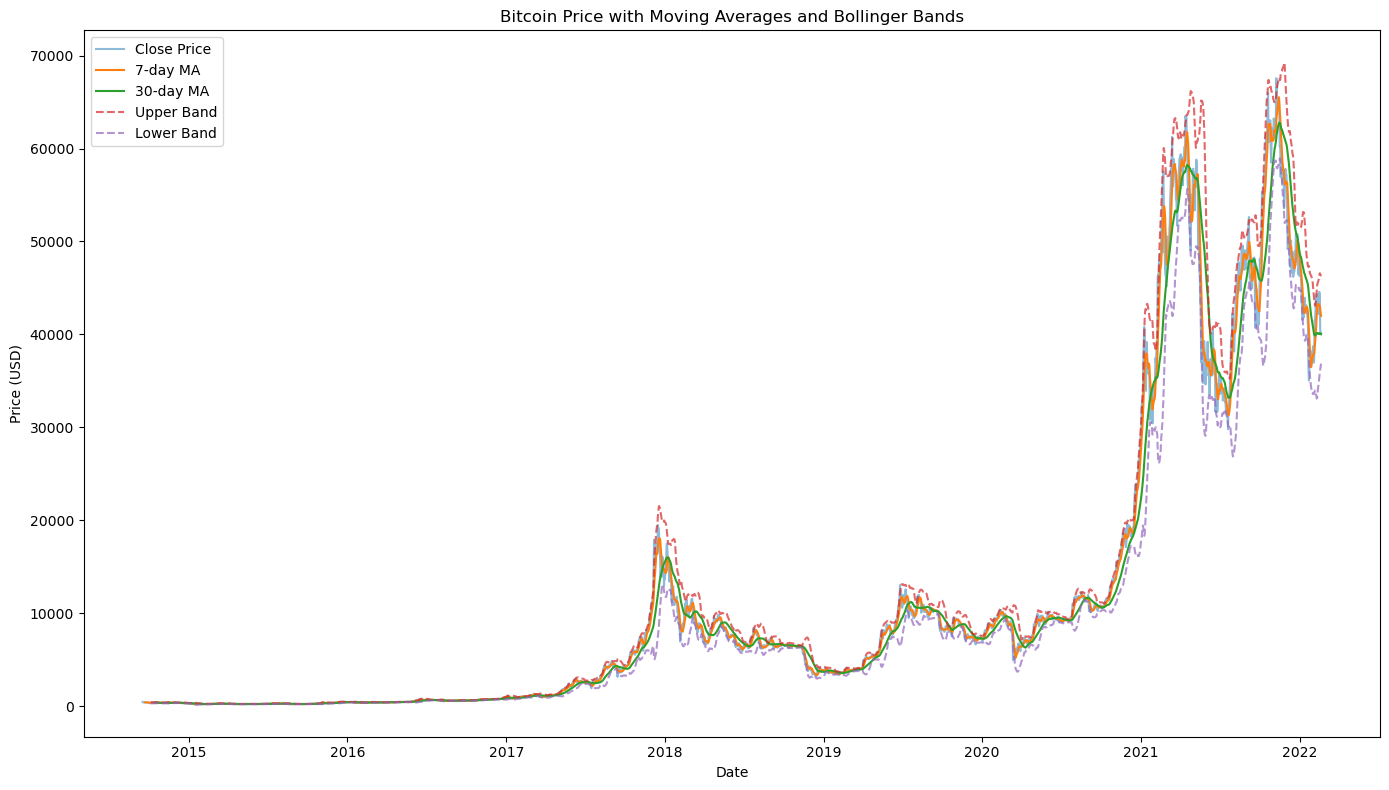

In [20]:
# Rolling means and Bollinger Bands
df['MA_7'] = df['Close'].rolling(window=7).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()
df['20_day_MA'] = df['Close'].rolling(window=20).mean()
df['20_day_STD'] = df['Close'].rolling(window=20).std()

# Bollinger Bands
df['Upper_Band'] = df['20_day_MA'] + (2 * df['20_day_STD'])
df['Lower_Band'] = df['20_day_MA'] - (2 * df['20_day_STD'])

# Plot
plt.figure(figsize=(14, 8))
plt.plot(df['Date'], df['Close'], label='Close Price', alpha=0.5)
plt.plot(df['Date'], df['MA_7'], label='7-day MA')
plt.plot(df['Date'], df['MA_30'], label='30-day MA')
plt.plot(df['Date'], df['Upper_Band'], label='Upper Band', linestyle='--', alpha=0.7)
plt.plot(df['Date'], df['Lower_Band'], label='Lower Band', linestyle='--', alpha=0.7)
plt.title('Bitcoin Price with Moving Averages and Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.tight_layout()
plt.show()

In [23]:
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day,MA_7,MA_30,20_day_MA,20_day_STD,Upper_Band,Lower_Band
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df = df.drop(["MA_7","MA_30","20_day_MA","20_day_STD","Upper_Band","Lower_Band"], axis=1)

In [27]:
df

,Date,Open,High,Low,Close,Volume,year,month,day
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21
...,...,...,...,...,...,...,...,...,...
2708,2022-02-15,42586.464844,44667.218750,42491.035156,44575.203125,22721659051,2022,2,15
2709,2022-02-16,44578.277344,44578.277344,43456.691406,43961.859375,19792547657,2022,2,16
2710,2022-02-17,43937.070313,44132.972656,40249.371094,40538.011719,26246662813,2022,2,17
2711,2022-02-18,40552.132813,40929.152344,39637.617188,40030.976563,23310007704,2022,2,18


In [ ]:
path  = ""
df.to_csv(path, index=False)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3714283254.py, line 1)